In [137]:
!pip install kneed

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from kneed import KneeLocator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [140]:
datos_entrenamiento = pd.read_csv("/content/drive/MyDrive/Data science/Segmentacion Clientes clusterisacion/datos_entrenamiento.csv")
datos=pd.read_csv("/content/drive/MyDrive/Data science/Segmentacion Clientes clusterisacion/datos_limpios.csv")

In [141]:
datos.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1367,4183.877488,1.000000,353.75,0.00,353.75,4137.147297,0.833333,0.000000,0.833333,0.250000,6,19,9000.0,8713.847904,1677.290468,0.000,12
3796,3676.225496,1.000000,2743.35,1299.63,1443.72,1095.478557,1.000000,0.666667,0.916667,0.083333,1,78,6000.0,1859.086356,1075.569803,0.000,12
5676,269.966481,0.636364,0.00,0.00,0.00,1579.555134,0.000000,0.000000,0.000000,0.166667,2,0,3000.0,2097.898378,272.284192,0.125,12
8825,33.725413,1.000000,388.44,0.00,388.44,0.000000,1.000000,0.000000,0.888889,0.000000,0,9,1000.0,317.537207,127.402267,1.000,9
2315,21.928045,0.909091,190.45,190.45,0.00,49.196465,0.166667,0.166667,0.000000,0.083333,1,2,8500.0,155.609598,66.465635,0.000,12


In [142]:
datos_entrenamiento.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
558,0.288020,1.0,0.000000,0.000000,0.000000,0.026290,0.000000,0.000000,0.000000,0.444445,0.065041,0.000000,0.198664,0.040614,0.017105,0.0,1.000000
3050,0.077981,1.0,0.003467,0.004171,0.000000,0.000000,0.416667,0.416667,0.000000,0.000000,0.000000,0.013966,0.048414,0.008008,0.006272,0.0,1.000000
3755,0.037650,1.0,0.007715,0.000000,0.016816,0.017012,1.000000,0.000000,0.857143,0.285714,0.065041,0.019553,0.031720,0.004174,0.004158,0.0,0.166667
8882,0.048937,1.0,0.023290,0.000000,0.050761,0.023632,1.000000,0.000000,0.857143,0.190476,0.024390,0.039106,0.031720,0.018876,0.013926,0.0,0.166667
1579,0.139185,1.0,0.010257,0.003140,0.016667,0.000000,0.500000,0.083333,0.416667,0.000000,0.000000,0.016760,0.098497,0.024232,0.017370,0.0,1.000000


In [143]:
rendimiento = {"Inercia":[],
               "Coef Silueta":[]}
index=[]

In [144]:
kmean_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}
inercias = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento)
  inercias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Metodo del codo')

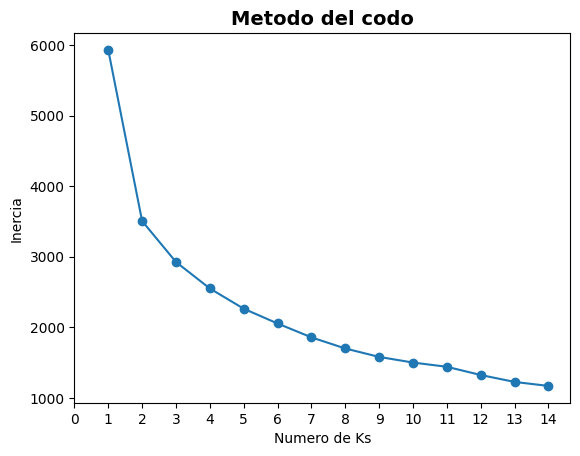

In [145]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [146]:
kneedle = KneeLocator(range(1,15),inercias,curve="convex", direction="decreasing")
punto_codo = kneedle.elbow
print(f"El posible numero de Ks optimo es {punto_codo}")

El posible numero de Ks optimo es 4


Text(0.5, 1.0, 'Metodo del codo')

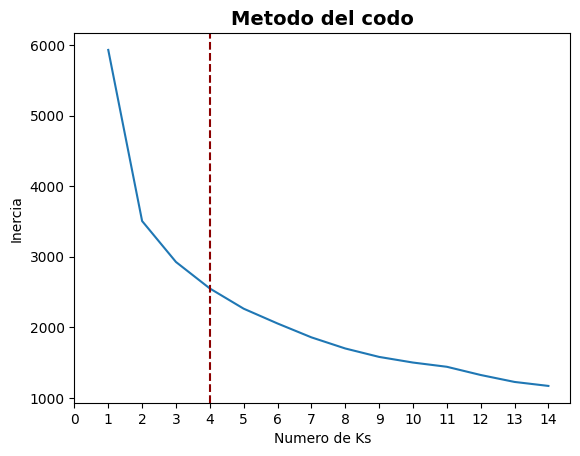

In [147]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias)
plt.axvline(x=punto_codo, color='darkred', label="anxline - full height", ls='--')
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [148]:
kmeans = KMeans(n_clusters=punto_codo, **kmean_set)
kmeans.fit(datos_entrenamiento)
coeficiente_silueta = silhouette_score(datos_entrenamiento, kmeans.labels_)

print(f"El coeficiente de silueta para mi modelo de Kmeans con 4 clusters es de {coeficiente_silueta}")

El coeficiente de silueta para mi modelo de Kmeans con 4 clusters es de 0.3215018280961262


In [149]:
coef_siluetas=[]
for i in range (2,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento)
  coef_siluetas.append(silhouette_score(datos_entrenamiento, kmeans.labels_))

Text(0.5, 1.0, 'Coeficiente de silueta')

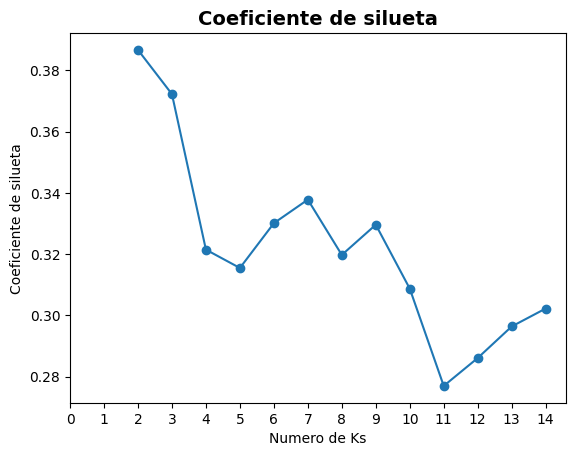

In [150]:
fig, ax = plt.subplots()
ax.plot(range(2,15),coef_siluetas,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Coeficiente de silueta')
plt.xlabel('Numero de Ks')
plt.title('Coeficiente de silueta',fontdict = {'fontsize':14, 'fontweight':'bold'})

El metodo del codo nos dio como posible numero optimo K=4, en este punto el coeficiente de silueta es aproximada 0.32. EL numero k optimo deberia estar despues de el numero K=4. Observamos que des pues de K=4 el coeficiente de silueta no presenta un mejor rendimiento en K=7 despues de este comienza a decaer el rendimiento del algoritmo. por este motivo vamos a tomar como optimo el k=7 que me presenta una baja inercia y un buen coeficiente de silueta.

Nota: con K=2 y K=3 se nos presenta el mejor coeficiente de silueta pero en estos puntos la inercia es demasiado alta.

In [151]:
datos_1 = datos.copy(deep=True)

kmeans = KMeans(n_clusters=4, **kmean_set)
kmeans.fit(datos_entrenamiento)
segmentos = kmeans.predict(datos_entrenamiento)
datos_1["Segmento"] =segmentos

rendimiento['Inercia'].append(kmeans.inertia_)
rendimiento['Coef Silueta'].append(silhouette_score(datos_entrenamiento, kmeans.labels_))
index.append("Todas Columnas")

# Modelo 2
Vamos a hacer una segmentacion utilizando solo 3 variables las cuales seran PURCHASE, CREDIT_LIMIT y PAYMENT

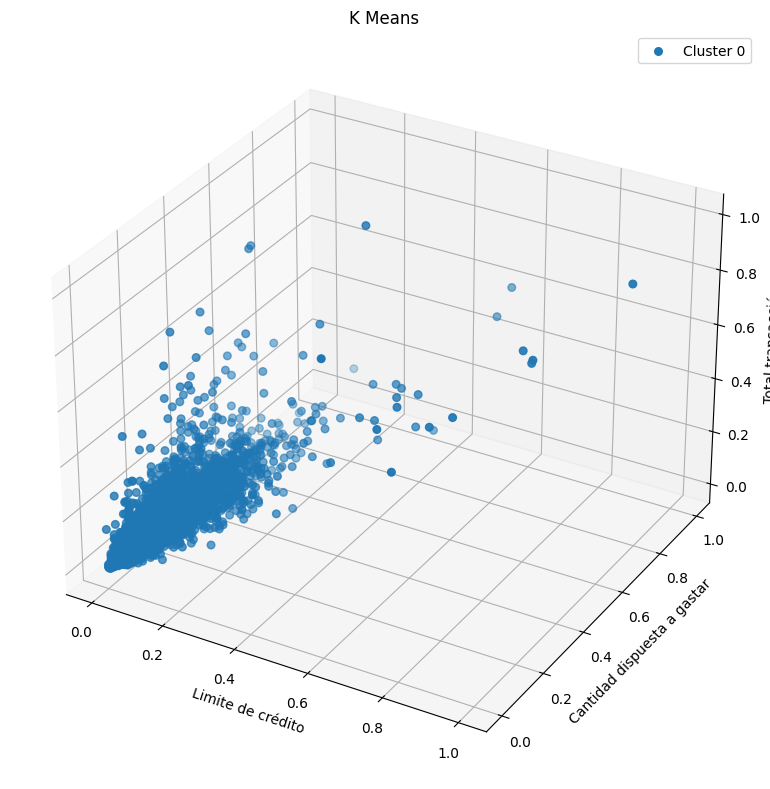

In [152]:
x = datos_entrenamiento.PURCHASES
y = datos_entrenamiento.CREDIT_LIMIT
z = datos_entrenamiento.PAYMENTS

# Crear una figura 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z,  marker='o', label='Cluster 0',s=30)

# Etiquetas de los ejes
ax.set_xlabel('Limite de crédito')
ax.set_ylabel('Cantidad dispuesta a gastar')
ax.set_zlabel('Total transacción')

plt.tight_layout()

# Título de la gráfica
plt.title('K Means')

# Mostrar leyenda
ax.legend()

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Data science/Segmentacion_cliente_3/3_variables.png')

# Mostrar la gráfica
plt.show()

In [153]:
kmean_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}
inercias_3v = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT","PAYMENTS"]])
  inercias_3v.append(kmeans.inertia_)

Text(0.5, 1.0, 'Metodo del codo')

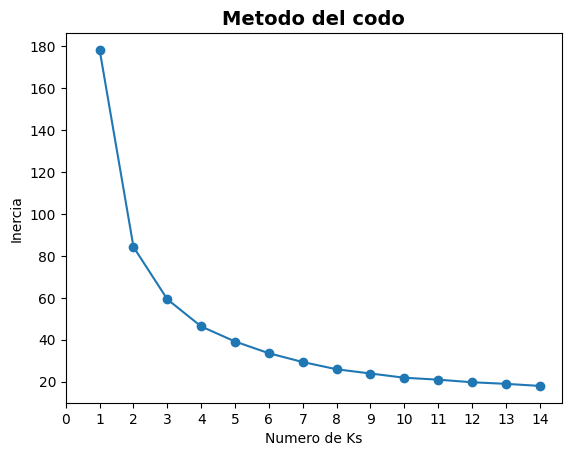

In [154]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias_3v,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [155]:
kneedle = KneeLocator(range(1,15),inercias_3v,curve="convex", direction="decreasing")
punto_codo_2 = kneedle.elbow
print(f"El posible numero de Ks optimo es {punto_codo_2}")

El posible numero de Ks optimo es 4


Text(0.5, 1.0, 'Metodo del codo')

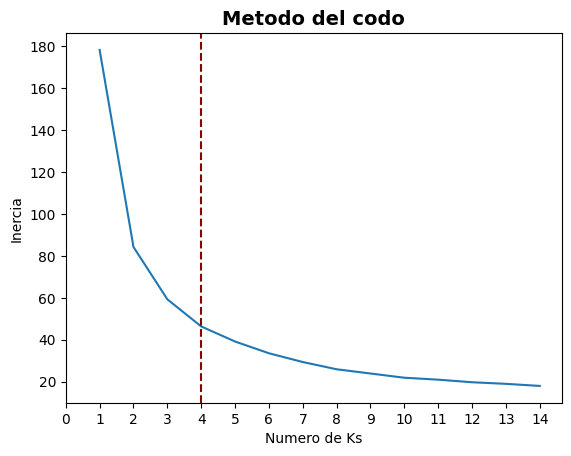

In [156]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias_3v)
plt.axvline(x=punto_codo_2, color='darkred', label="anxline - full height", ls='--')
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [157]:
coef_siluetas_2=[]
for i in range (2,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento)
  coef_siluetas_2.append(silhouette_score(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT","PAYMENTS"]], kmeans.labels_))

In [158]:
print(len(coef_siluetas_2))

13


Text(0.5, 1.0, 'Coeficiente de silueta')

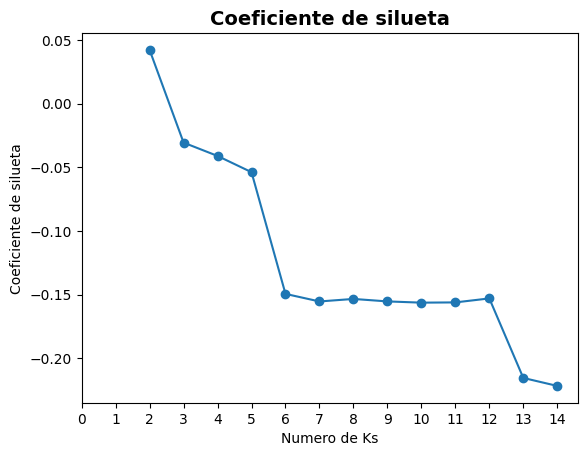

In [159]:
fig, ax = plt.subplots()
ax.plot(range(2,15),coef_siluetas_2,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Coeficiente de silueta')
plt.xlabel('Numero de Ks')
plt.title('Coeficiente de silueta',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [160]:
datos_2 = datos.copy(deep=True)

kmeans = KMeans(n_clusters=4, **kmean_set)
kmeans.fit(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT","PAYMENTS"]])
segmentos = kmeans.predict(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT","PAYMENTS"]])
datos_2["Segmento"]=segmentos

rendimiento['Inercia'].append(kmeans.inertia_)
rendimiento['Coef Silueta'].append(silhouette_score(datos_entrenamiento, kmeans.labels_))
index.append("3 columnas")

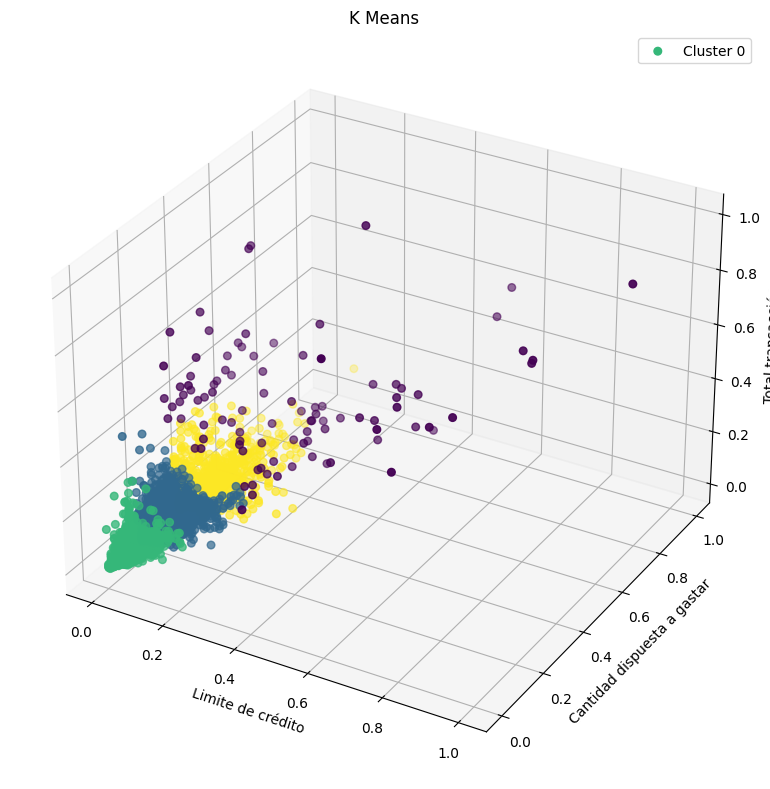

In [161]:
x = datos_entrenamiento.PURCHASES
y = datos_entrenamiento.CREDIT_LIMIT
z = datos_entrenamiento.PAYMENTS

# Crear una figura 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z,  marker='o', label='Cluster 0',c=segmentos,s=30)

# Etiquetas de los ejes
ax.set_xlabel('Limite de crédito')
ax.set_ylabel('Cantidad dispuesta a gastar')
ax.set_zlabel('Total transacción')

plt.tight_layout()

# Título de la gráfica
plt.title('K Means')

# Mostrar leyenda
ax.legend()

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Data science/Segmentacion_cliente_3/3_variables.png')

# Mostrar la gráfica
plt.show()

# Modelo 3
Vamos a hacer una segmentacion utilizando solo las variables PURCHASES y LIMIT_CREDIT

Text(0.5, 1.0, 'Credit Limit vs Purchases')

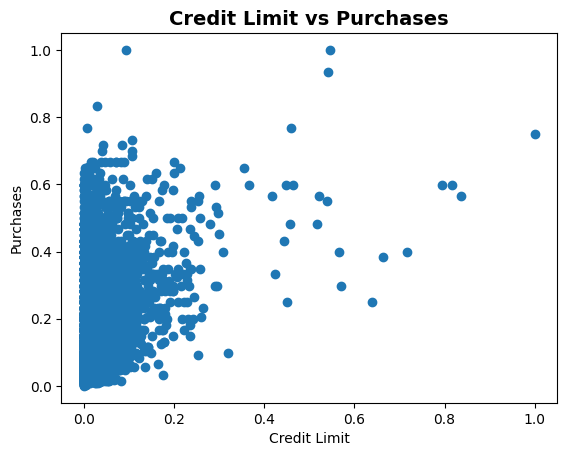

In [162]:
fig, ax = plt.subplots()

ax.scatter(datos_entrenamiento.PURCHASES,datos_entrenamiento.CREDIT_LIMIT)


plt.ylabel('Purchases')
plt.xlabel('Credit Limit')
plt.title('Credit Limit vs Purchases',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [163]:
kmean_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}
inercias_2v = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]])
  inercias_2v.append(kmeans.inertia_)

Text(0.5, 1.0, 'Metodo del codo')

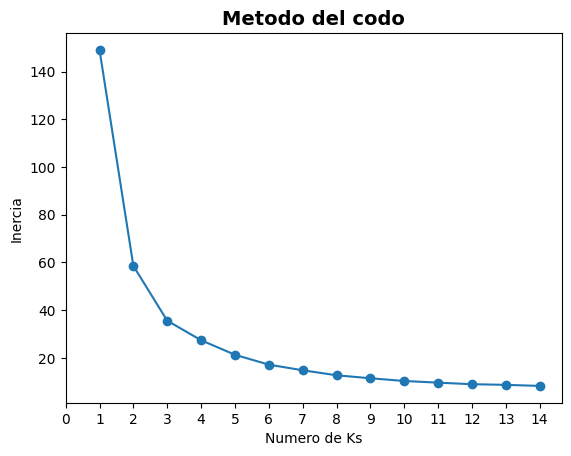

In [164]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias_2v,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [165]:
kneedle = KneeLocator(range(1,15),inercias_2v,curve="convex", direction="decreasing")
punto_codo_3 = kneedle.elbow
print(f"El posible numero de Ks optimo es {punto_codo_3}")

El posible numero de Ks optimo es 3


Text(0.5, 1.0, 'Metodo del codo')

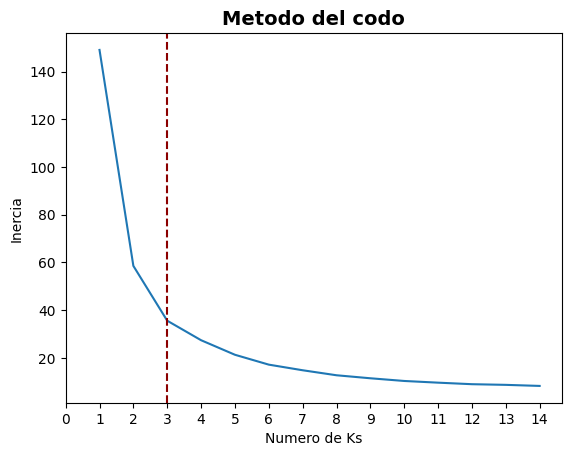

In [166]:
fig, ax = plt.subplots()
ax.plot(range(1,15),inercias_2v)
plt.axvline(x=punto_codo_3, color='darkred', label="anxline - full height", ls='--')
ax.set_xticks(range(0, 15))

plt.ylabel('Inercia')
plt.xlabel('Numero de Ks')
plt.title('Metodo del codo',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [167]:
coef_siluetas_3=[]
for i in range (2,15):
  kmeans = KMeans(n_clusters=i, **kmean_set)
  kmeans.fit(datos_entrenamiento)
  coef_siluetas_3.append(silhouette_score(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]], kmeans.labels_))

Text(0.5, 1.0, 'Coeficiente de silueta')

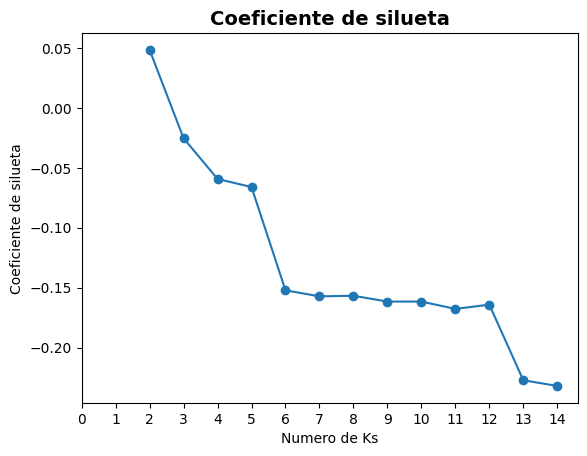

In [168]:
fig, ax = plt.subplots()
ax.plot(range(2,15),coef_siluetas_3,marker="o")
ax.set_xticks(range(0, 15))

plt.ylabel('Coeficiente de silueta')
plt.xlabel('Numero de Ks')
plt.title('Coeficiente de silueta',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [169]:
datos_3 = datos.copy(deep=True)

kmeans = KMeans(n_clusters=3, **kmean_set)
kmeans.fit(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]])
segmentos = kmeans.predict(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]])
datos_3["Segmento"]=segmentos

rendimiento['Inercia'].append(kmeans.inertia_)
rendimiento['Coef Silueta'].append(silhouette_score(datos_entrenamiento, kmeans.labels_))
index.append("dos Columnas 3ks")

<Axes: xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

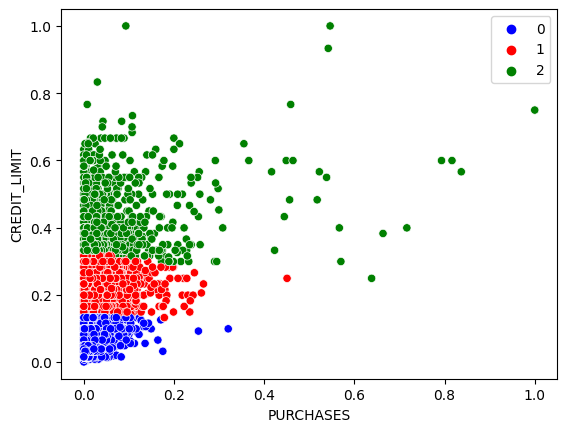

In [170]:
#fig, ax = plt.subplots()
colores_personalizados = ["blue", "red", "green"]
sns.scatterplot(x=datos_entrenamiento.PURCHASES,y=datos_entrenamiento.CREDIT_LIMIT,hue=segmentos,palette=colores_personalizados)
#ax.scatter(datos_entrenamiento.PURCHASES,datos_entrenamiento.CREDIT_LIMIT,)


#plt.ylabel('Purchases')
#plt.xlabel('Credit Limit')
#plt.title('Credit Limit vs Purchases',fontdict = {'fontsize':14, 'fontweight':'bold'})

vamos a probar el mismo modelo pero con 4 segmentos


In [171]:
datos_4 = datos.copy(deep=True)

kmeans = KMeans(n_clusters=4, **kmean_set)
kmeans.fit(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]])
segmentos = kmeans.predict(datos_entrenamiento[["PURCHASES","CREDIT_LIMIT"]])
datos_4["Segmento"]=segmentos

rendimiento['Inercia'].append(kmeans.inertia_)
rendimiento['Coef Silueta'].append(silhouette_score(datos_entrenamiento, kmeans.labels_))
index.append("dos Columnas 4Ks")

<Axes: xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

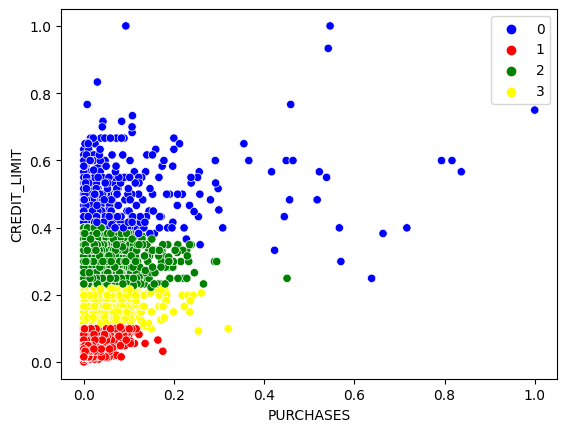

In [172]:
colores_personalizados = ["blue", "red", "green","yellow"]
sns.scatterplot(x=datos_entrenamiento.PURCHASES,y=datos_entrenamiento.CREDIT_LIMIT,hue=segmentos , palette=colores_personalizados)

In [173]:
pd.DataFrame(rendimiento,index=index)

,Inercia,Coef Silueta
Todas Columnas,2550.676384,0.321502
3 columnas,46.345601,0.028727
dos Columnas 3ks,35.583987,0.028099
dos Columnas 4Ks,27.408123,0.010055
